In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [2]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/체질검사.csv',engine='python',encoding='euc-kr')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
df_y = df["FAT"]
df_x = df.drop("FAT", axis=1,inplace = False)
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 , random_state = 1234)


In [5]:
rf_uncustomized = GradientBoostingRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print(rf_uncustomized.score(df_train_x,df_train_y))
print(rf_uncustomized.score(df_test_x,df_test_y))

0.980558197332829
0.5844858740027485


In [6]:
train_score=[]; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['TestScore']= test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.589
6,70,0.963,0.590
7,80,0.970,0.584
8,90,0.976,0.585
9,100,0.981,0.584


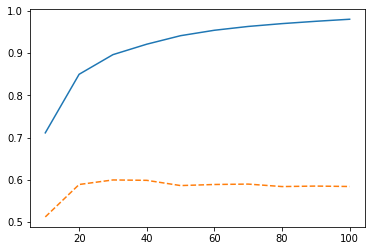

In [7]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = "train score")
plt.plot(para_n_tree, test_score, linestyle = '--', label = "test_score")

In [11]:
train_score=[]; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=GradientBoostingRegressor(n_estimators=30,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['para_leaf']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['TestScore']= test_score
df_score_leaf.round(3)

,para_leaf,TrainScore,TestScore
0,1,0.897,0.600
1,2,0.899,0.596
2,3,0.896,0.595
3,4,0.893,0.586
4,5,0.890,0.604
5,6,0.888,0.596
6,7,0.884,0.590
7,8,0.874,0.610
8,9,0.879,0.598
9,10,0.873,0.587


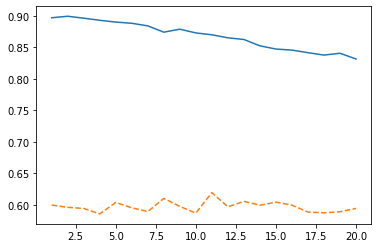

In [12]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, test_score, linestyle = '--', label = "test_score")

In [20]:
train_score=[]; test_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=GradientBoostingRegressor(n_estimators=30,min_samples_leaf=11,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_split=pd.DataFrame()
df_score_split['n_estimator']= para_split
df_score_split['TrainScore']= train_score
df_score_split['TestScore']= test_score
df_score_split.round(3)

,n_estimator,TrainScore,TestScore
0,4,0.870,0.620
1,6,0.870,0.620
2,8,0.870,0.620
3,10,0.870,0.620
4,12,0.870,0.620
5,14,0.870,0.620
6,16,0.870,0.620
7,18,0.870,0.620
8,20,0.870,0.620
9,22,0.870,0.620


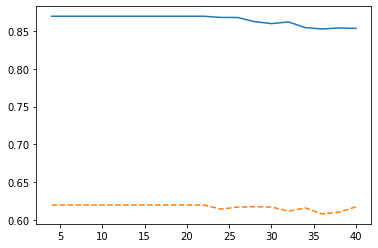

In [21]:
plt.plot(para_split, train_score, linestyle = '-', label = "train score")
plt.plot(para_split, test_score, linestyle = '--', label = "test_score")

In [33]:
train_score=[]; test_score = []
para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf=GradientBoostingRegressor(n_estimators=30,min_samples_leaf=11,min_samples_split=22, max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,depth,TrainScore,TestScore
0,1,0.703,0.592
1,2,0.800,0.600
2,3,0.870,0.620
3,4,0.900,0.629
4,5,0.913,0.613
5,6,0.917,0.614
6,7,0.920,0.613
7,8,0.920,0.615
8,9,0.921,0.609
9,10,0.922,0.616


In [30]:
train_score=[]; test_score = []
para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    rf=GradientBoostingRegressor(n_estimators=30,min_samples_leaf=11,min_samples_split=24, max_depth=4,learning_rate=v_learning_rate, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['learning_rate']= para_lr
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,learning_rate,TrainScore,TestScore
0,0.1,0.891,0.626
1,0.2,0.942,0.579
2,0.3,0.958,0.572
3,0.4,0.974,0.578
4,0.5,0.986,0.536
5,0.6,0.991,0.525
6,0.7,0.991,0.490
7,0.8,0.993,0.546
8,0.9,0.995,0.486


In [34]:
rf_final = GradientBoostingRegressor(n_estimators=30,min_samples_leaf=11,min_samples_split=22, max_depth=4, learning_rate=0.1,random_state = 1234)
rf_final.fit(df_train_x,df_train_y)

print(rf_final.score(df_train_x, df_train_y))
print(rf_final.score(df_test_x, df_test_y))

0.8996509846110846
0.6288342830057724


Text(0, 0.5, '변수')

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

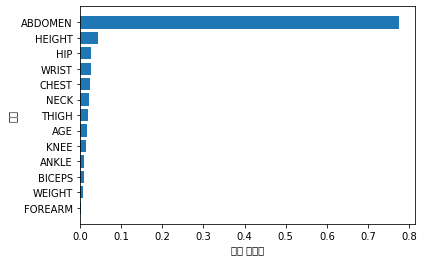

In [28]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)


df_importance.sort_values("Importance", ascending =True , inplace= True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


In [38]:
estimator = GradientBoostingRegressor(random_state=1234)
param_grid = {"criterion":["mse", "friedman_mse", "mae"],"max_features":["auto",'sqrt','log2'],"learning_rate":para_lr,
             "max_depth":para_depth, 
             "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs =-1)
grid_dt.fit(df_train_x, df_train_y)

print(grid_dt.best_estimator_)
print(grid_dt.best_params_)
print(grid_dt.best_score_.round(3))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.2, loss='ls', max_depth=1,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'criterion': 'mae', 'learning_rate': 0.2, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 6}
0.708


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 실습 문제 시작

In [3]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/DIABETES.csv',engine='python',encoding='euc-kr')
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [4]:
df_y = df["Y"]
df_x = df.drop("Y", axis=1,inplace = False)
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 , random_state = 1234)


In [5]:
rf_uncustomized = GradientBoostingRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print(rf_uncustomized.score(df_train_x,df_train_y))
print(rf_uncustomized.score(df_test_x,df_test_y))

0.8650005703987425
0.45145583756787616


In [6]:
train_score=[]; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['TestScore']= test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.504,0.430
1,20,0.639,0.494
2,30,0.707,0.500
3,40,0.751,0.487
4,50,0.778,0.480
5,60,0.802,0.472
6,70,0.825,0.465
7,80,0.841,0.462
8,90,0.852,0.459
9,100,0.865,0.451


In [7]:
train_score=[]; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=GradientBoostingRegressor(n_estimators=30,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['para_leaf']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['TestScore']= test_score
df_score_leaf.round(3)

,para_leaf,TrainScore,TestScore
0,1,0.707,0.500
1,2,0.708,0.505
2,3,0.701,0.505
3,4,0.700,0.492
4,5,0.691,0.468
5,6,0.683,0.492
6,7,0.682,0.496
7,8,0.675,0.490
8,9,0.679,0.498
9,10,0.684,0.502


In [8]:
train_score=[]; test_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=GradientBoostingRegressor(n_estimators=30,min_samples_leaf=3,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_split=pd.DataFrame()
df_score_split['n_estimator']= para_split
df_score_split['TrainScore']= train_score
df_score_split['TestScore']= test_score
df_score_split.round(3)

,n_estimator,TrainScore,TestScore
0,4,0.701,0.505
1,6,0.701,0.505
2,8,0.703,0.505
3,10,0.704,0.510
4,12,0.699,0.510
5,14,0.698,0.511
6,16,0.698,0.511
7,18,0.692,0.518
8,20,0.688,0.498
9,22,0.688,0.506


In [10]:
train_score=[]; test_score = []
para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf=GradientBoostingRegressor(n_estimators=30,min_samples_leaf=3,min_samples_split=18, max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,depth,TrainScore,TestScore
0,1,0.486,0.495
1,2,0.594,0.517
2,3,0.692,0.518
3,4,0.783,0.496
4,5,0.858,0.429
5,6,0.906,0.434
6,7,0.928,0.391
7,8,0.940,0.384
8,9,0.949,0.374
9,10,0.950,0.399


In [13]:
train_score=[]; test_score = []
para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    rf=GradientBoostingRegressor(n_estimators=30,min_samples_leaf=3,min_samples_split=18, max_depth=4,learning_rate=v_learning_rate, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['learning_rate']= para_lr
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,learning_rate,TrainScore,TestScore
0,0.1,0.783,0.496
1,0.2,0.867,0.408
2,0.3,0.907,0.427
3,0.4,0.930,0.364
4,0.5,0.959,0.344
5,0.6,0.969,0.299
6,0.7,0.983,0.106
7,0.8,0.979,0.098
8,0.9,0.988,0.020


In [19]:
rf_final = GradientBoostingRegressor(n_estimators=30,min_samples_leaf=3,min_samples_split=18, max_depth=4, learning_rate=0.1,random_state = 1234)
rf_final.fit(df_train_x,df_train_y)

print(rf_final.score(df_train_x, df_train_y))
print(rf_final.score(df_test_x, df_test_y))

0.7828708645185536
0.4957815859902026


의사결정 35
랜덤포레스트 47
그래디언트  49
30 3 18 4 0.1

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib in line


UsageError: unrecognized arguments: line


In [42]:

df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/체질검사.csv',engine='python',encoding='euc-kr')
df.head()

df_y = df["FAT"]
df_x = df.drop("FAT", axis=1,inplace = False)
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 , random_state = 1234)


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        12:06:15   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

# mse mas 값 구하기 ~.~

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

lr_model = smf.ols(formula = "FAT ~ NECK+ABDOMEN+HIP+FOREARM+WRIST",data = df)
lr_result = lr_model.fit()
print(lr_result.summary())

df_model=DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=20, max_depth=4,random_state = 1234)
df_model.fit(df_train_x,df_train_y)

rf_model = RandomForestRegressor(n_estimators=100,min_samples_leaf=6,min_samples_split=14, max_depth=4,random_state = 1234)
rf_model.fit(df_train_x,df_train_y)

gb_model = GradientBoostingRegressor(n_estimators=30,min_samples_leaf=11,min_samples_split=22, max_depth=4, learning_rate=0.1,random_state = 1234)
gb_model.fit(df_train_x,df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=11, min_samples_split=22,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

models= ["회귀분석","의사결정나무","랜덤포레스트","그래디언트 부스팅"]
mse,rmse,mae,mape=[],[],[],[]

lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))


In [69]:

df_y_pred = df_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,df_y_pred))
rmse.append(root_mean_squared_error(df_test_y,df_y_pred))
mae.append(mean_absolute_error(df_test_y,df_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,df_y_pred))


In [70]:

rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))


In [71]:

gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

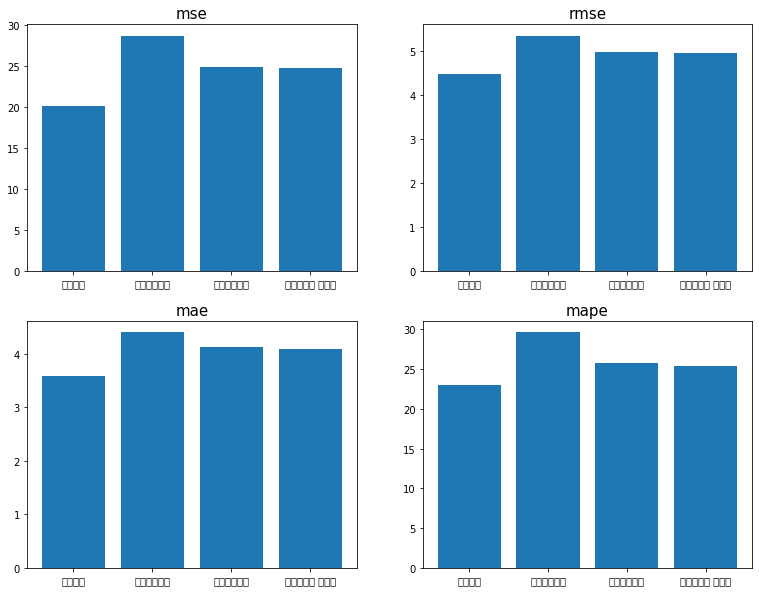

In [72]:
fig, ax= plt.subplots(2,2, figsize = (13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title('mape').set_fontsize(15)

In [75]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/DIABETES.csv',engine='python',encoding='euc-kr')
df.head()

df_y = df["Y"]
df_x = df.drop("Y", axis=1,inplace = False)
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 , random_state = 1234)


In [76]:

lr_model = smf.ols(formula = "Y ~ GENDER+BMI+BP+CHOLESTEROL+LDL+TCH+LTG",data = df)
lr_result = lr_model.fit()
print(lr_result.summary())

df_model=DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=28, max_depth=2,random_state = 1234)
df_model.fit(df_train_x,df_train_y)

rf_model = RandomForestRegressor(n_estimators=100,min_samples_leaf=6,min_samples_split=14, max_depth=4,random_state = 1234)
rf_model.fit(df_train_x,df_train_y)

gb_model = GradientBoostingRegressor(n_estimators=30,min_samples_leaf=3,min_samples_split=18, max_depth=4, learning_rate=0.1,random_state = 1234)
gb_model.fit(df_train_x,df_train_y)

models= ["회귀분석","의사결정나무","랜덤포레스트","그래디언트 부스팅"]
mse,rmse,mae,mape=[],[],[],[]

lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     66.18
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.48e-64
Time:                        13:48:27   Log-Likelihood:                -2386.7
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     434   BIC:                             4822.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -296.3984     29.716     -9.974      

In [77]:

df_y_pred = df_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,df_y_pred))
rmse.append(root_mean_squared_error(df_test_y,df_y_pred))
mae.append(mean_absolute_error(df_test_y,df_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,df_y_pred))

rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

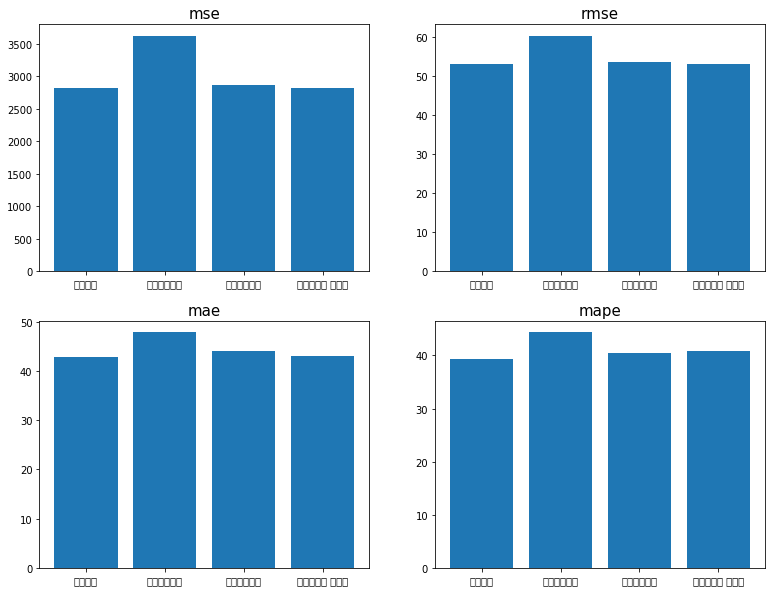

In [78]:
fig, ax= plt.subplots(2,2, figsize = (13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title('mape').set_fontsize(15)

In [79]:
from sklearn.decomposition import PCA
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler


In [80]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/직무능력평가.csv',engine='python',encoding='euc-kr')
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [82]:
df_raw_x=df.drop("EVAL",axis=1)
df_raw_y=df["EVAL"]
df_raw_x.head()
df_raw_y.head()

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

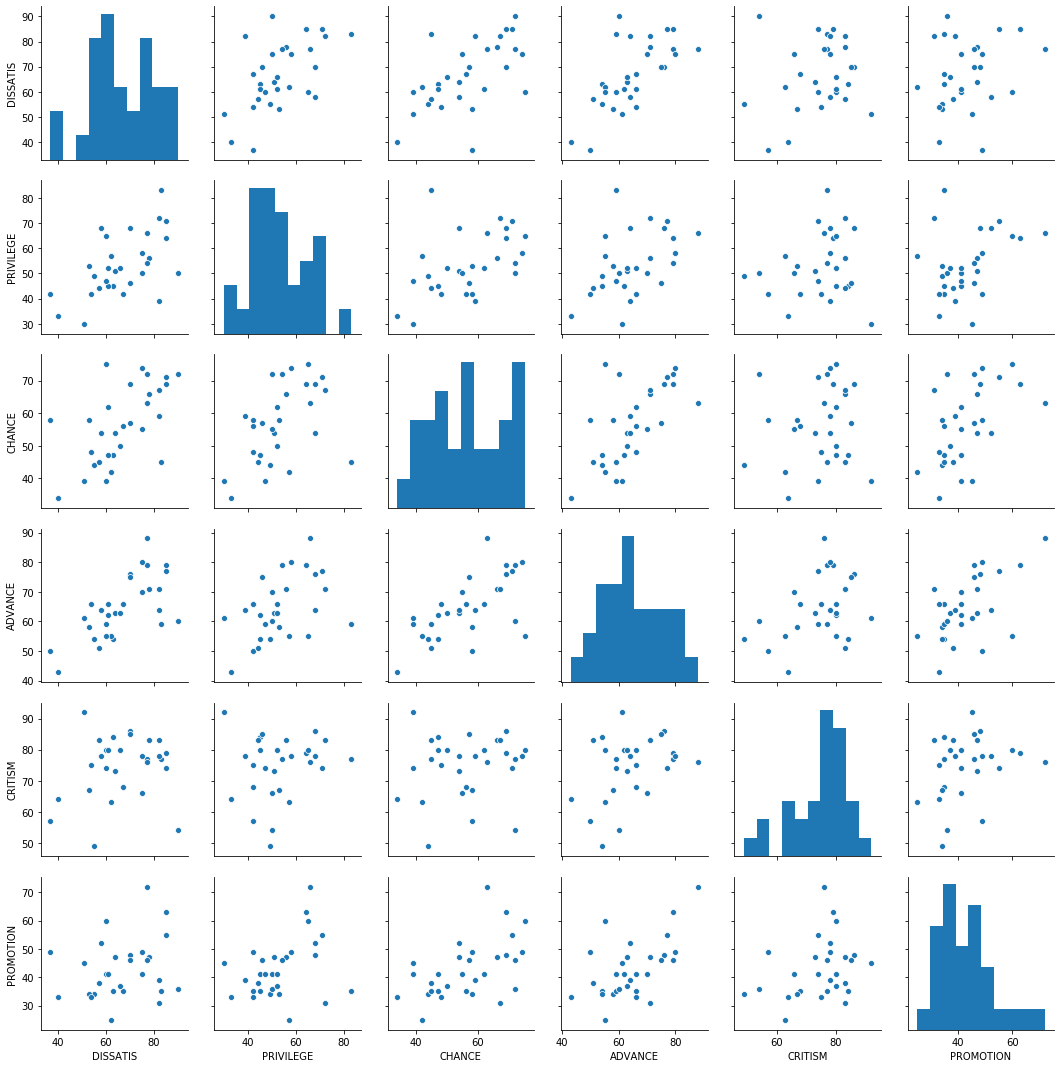

In [83]:
sns.pairplot(df_raw_x)


In [84]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [85]:
df_raw_x.describe().round(3)


,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [88]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print("Scaled data : \n{}" .format(nd_scaled[:5].round(3)))
print("Shape : \n{}" .format(nd_scaled.shape))



Scaled data : 
[[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape : 
(30, 6)


In [89]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [90]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [91]:
pca=PCA(n_components=6)
nd_pca=pca.fit_transform(df_scaled)

print(nd_pca[:5])
print(nd_pca.shape)


[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
(30, 6)


In [107]:
df_pca = pd.DataFrame(nd_pca,columns=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()



,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [93]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,7)]
df_pca_stat['Eigenvalues']= pca.explained_variance_
df_pca_stat['EigenvaluesRatio']= pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)




,PrinNo,Eigenvalues,EigenvaluesRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


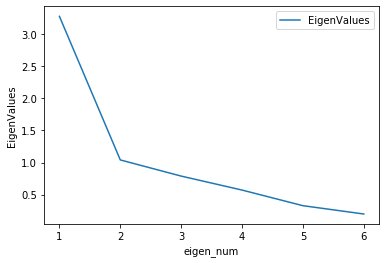

In [97]:
plt.plot(df_pca_stat['PrinNo'],df_pca_stat["Eigenvalues"],
        label='EigenValues')
plt.ylabel("EigenValues")
plt.xlabel("eigen_num")
plt.legend(loc="best")

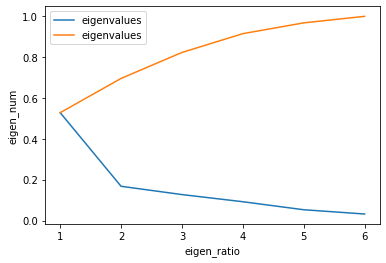

In [98]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenvaluesRatio"],label="eigenvalues")
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["CumEigenValueRatio"],label="eigenvalues")
plt.xlabel("eigen_ratio")
plt.ylabel("eigen_num")
plt.legend(loc='best')



In [100]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, columns=['Pin1','Prin2','Prin3','Prin4','Prin5','Prin6'])],axis=1)
df_eigenvector.round(3)



,Feature,Pin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


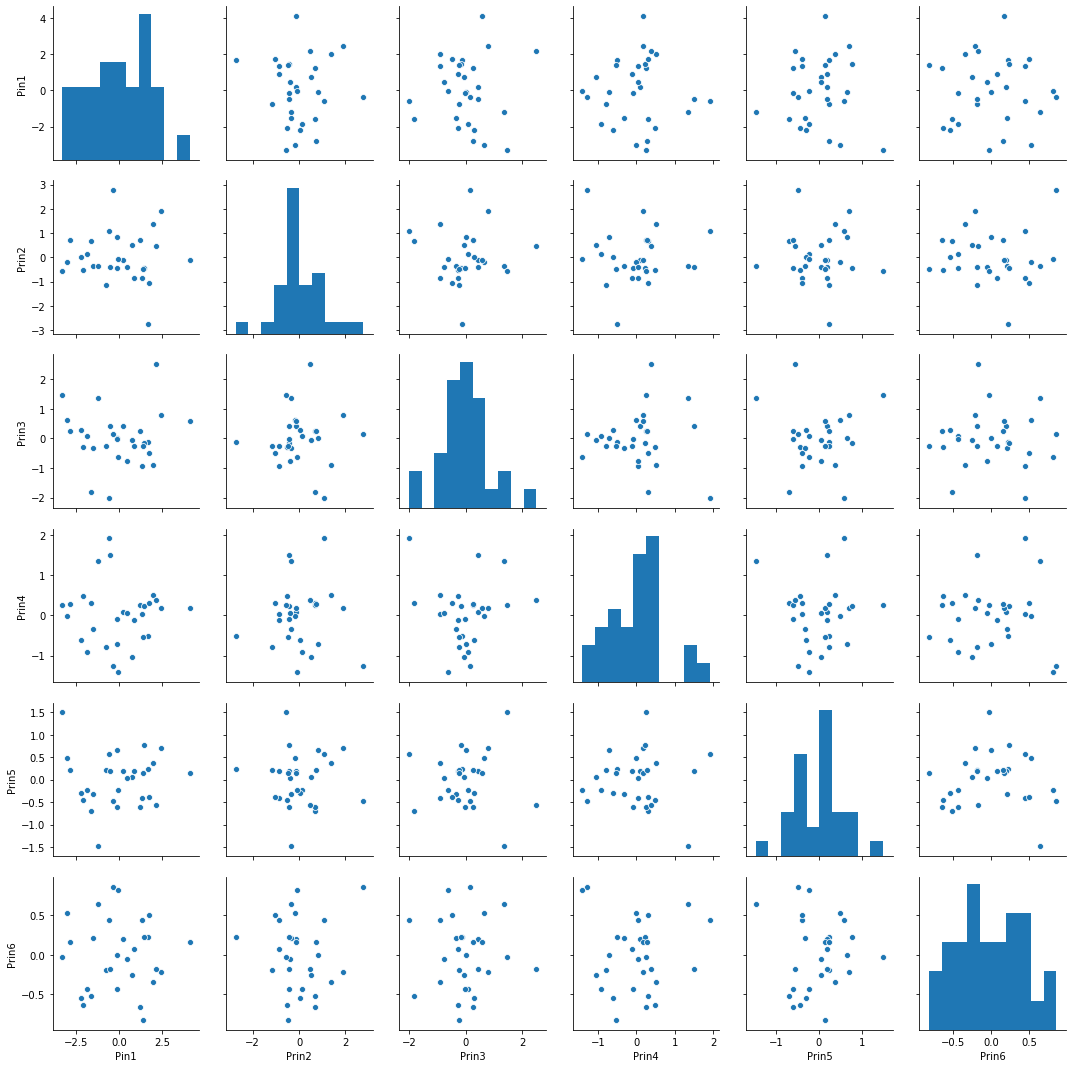

In [101]:
sns.pairplot(df_pca)

In [102]:
df_pca.corr().round(3)

,Pin1,Prin2,Prin3,Prin4,Prin5,Prin6
Pin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


In [103]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model=sm.OLS(df_raw_y,df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.24e-05
Time:                        15:34:55   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [104]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y,df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.24e-05
Time:                        15:36:12   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [108]:
x_var =["Prin1","Prin2","Prin3"]
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

#전체 설명변수를 이영한 모델보다 3개 주성분을 이용한 회귀모델의 설명력이 약 11% 저하됨
#기여율이 약한 주성분 3개를 제외하여 설명력 저하됨
#주성분 회귀분석의 회귀계수는 모두 유의함

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.02e-05
Time:                        15:39:46   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# 주성분 분석 실습시작

In [109]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/IRIS.csv',engine='python',encoding='euc-kr')
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [110]:

df_raw_x=df.drop("SPECIES",axis=1)
df_raw_y=df["SPECIES"]
df_raw_x.head()
df_raw_y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: SPECIES, dtype: object

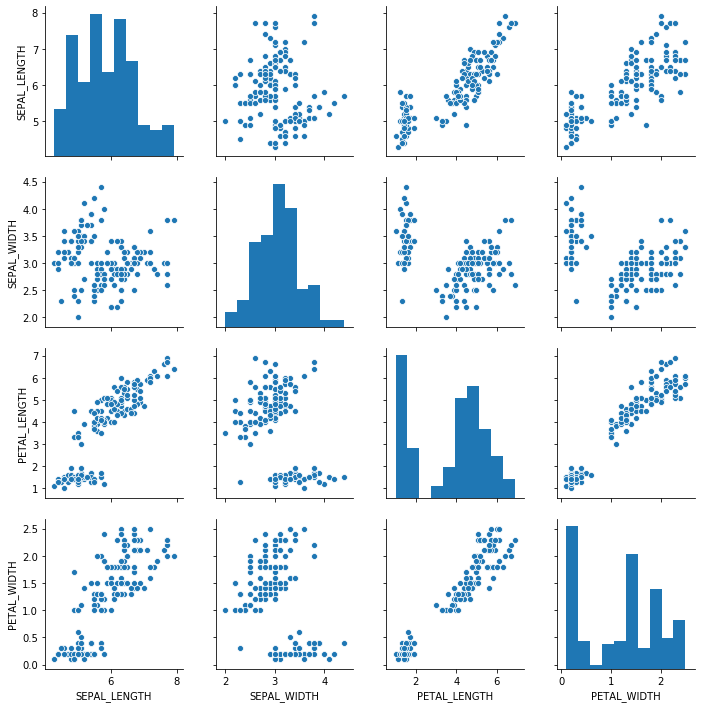

In [112]:
sns.pairplot(df_raw_x)

In [113]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [114]:
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [115]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print("Scaled data : \n{}" .format(nd_scaled[:5].round(3)))
print("Shape : \n{}" .format(nd_scaled.shape))



Scaled data : 
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape : 
(150, 4)


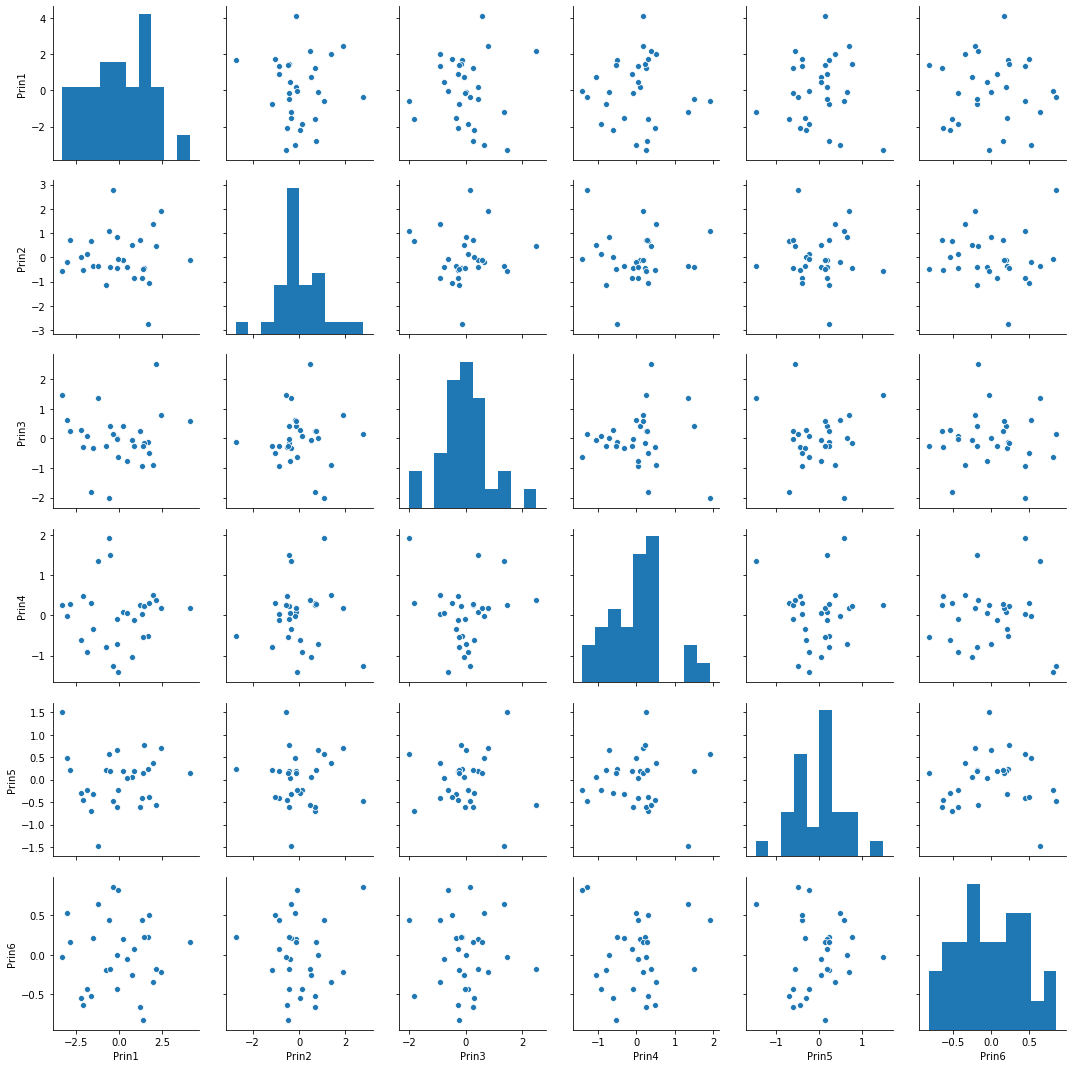

In [111]:
sns.pairplot(df_pca)

In [116]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [119]:
pca=PCA(n_components=4)
nd_pca=pca.fit_transform(df_scaled)

print(nd_pca[:5])
print(nd_pca.shape)


[[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
(150, 4)


In [125]:
df_pca = pd.DataFrame(nd_pca,columns=['Prin1','Prin2','Prin3','Prin4'])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [121]:


df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,5)]
df_pca_stat['Eigenvalues']= pca.explained_variance_
df_pca_stat['EigenvaluesRatio']= pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,Eigenvalues,EigenvaluesRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


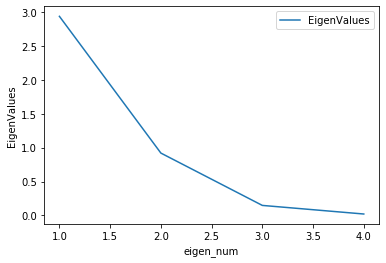

In [126]:
plt.plot(df_pca_stat['PrinNo'],df_pca_stat["Eigenvalues"],
        label='EigenValues')
plt.ylabel("EigenValues")
plt.xlabel("eigen_num")
plt.legend(loc="best")

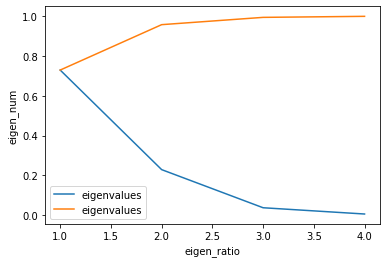

In [127]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenvaluesRatio"],label="eigenvalues")
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["CumEigenValueRatio"],label="eigenvalues")
plt.xlabel("eigen_ratio")
plt.ylabel("eigen_num")
plt.legend(loc='best')

In [129]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, columns=['Pin1','Prin2','Prin3','Prin4'])],axis=1)
df_eigenvector.round(3)


,Feature,Pin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524
